# Product 

In [29]:
import pandas as pd

df_raw = pd.read_csv(
    "https://drive.google.com/uc?id=1L8AUVWoSToH5dPQeVKo-LaWTbiaAsjwa&export=download"
)
# define df for consistency with other cells and display the head
df = df_raw
df.head()


,Unnamed: 0,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product Name,Sales,Units,Gross Profit,Cost,Factory,Latitude,Longitude
0,0,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60,Wicked Choccy's,32.076176,-81.088371
1,1,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20,Lot's O' Nuts,32.881893,-111.768036
2,2,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40,Lot's O' Nuts,32.881893,-111.768036
3,3,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42,Wicked Choccy's,32.076176,-81.088371
4,4,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28,Wicked Choccy's,32.076176,-81.088371


# Best performing product 

In [31]:
product_summary = (
    df_raw
    .groupby(['Product Name', 'Division'], as_index=False)
    .agg(
        Total_Units=('Units', 'sum'),
        Total_Sales=('Sales', 'sum')
    )
    .sort_values('Total_Units', ascending=False)
    .rename(columns={'Product Name': 'Product_Name'})
)

top5_units = product_summary.head(5)
print(top5_units)


                         Product_Name   Division  Total_Units  Total_Sales
10         Wonka Bar - Milk Chocolate  Chocolate         8267     26867.75
13     Wonka Bar -Scrumdiddlyumptious  Chocolate         7743     27874.80
12  Wonka Bar - Triple Dazzle Caramel  Chocolate         7596     28485.00
9           Wonka Bar - Fudge Mallows  Chocolate         6914     24890.40
11  Wonka Bar - Nutty Crunch Surprise  Chocolate         6755     23574.95


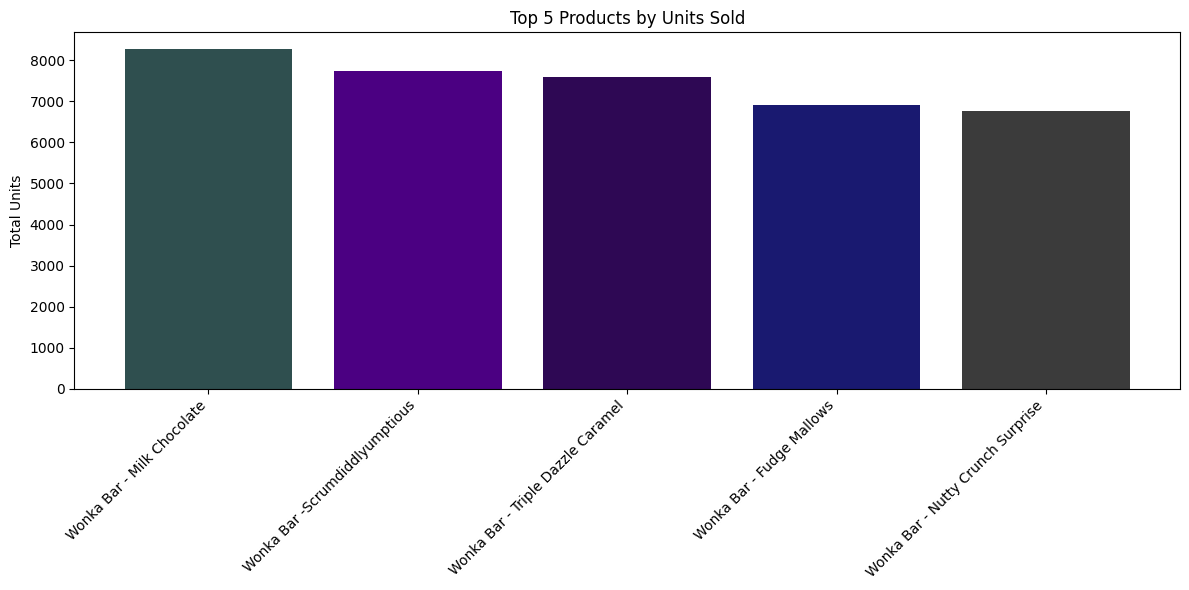

In [35]:
import matplotlib.pyplot as plt

top5 = product_summary.sort_values('Total_Units', ascending=False).head(5)

colors = ['#2F4F4F',  # dark slate gray
          '#4B0082',  # indigo
          '#2E0854',  # dark purple
          '#191970',  # midnight blue
          '#3B3B3B']  # dark gray

plt.figure(figsize=(12, 6))
plt.bar(top5['Product_Name'], top5['Total_Units'], color=colors[:len(top5)])
plt.title('Top 5 Products by Units Sold')
plt.ylabel('Total Units')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# The Least performing product 

In [42]:
product_summary = (
    df_raw
    .groupby(['Product Name', 'Division'], as_index=False)
    .agg(
        Total_Units=('Units', 'sum'),
        Total_Sales=('Sales', 'sum')
    )
    .sort_values('Total_Units', ascending=True)
    .rename(columns={'Product Name': 'Product_Name'})
)

last10_units = product_summary.head(10)
print(last10_units)


              Product_Name Division  Total_Units  Total_Sales
2                  Fun Dip    Sugar            8        12.00
7                    Nerds    Sugar           10        15.00
0   Everlasting Gobstopper    Sugar           13       130.00
3              Hair Toffee    Sugar           17        76.50
1     Fizzy Lifting Drinks    Sugar           21        78.75
5              Laffy Taffy    Sugar           27        53.73
8                SweeTARTS    Sugar           41        61.50
4                Kazookles    Other          371      1205.75
6       Lickable Wallpaper    Other          393      7860.00
14               Wonka Gum    Other          478       597.50


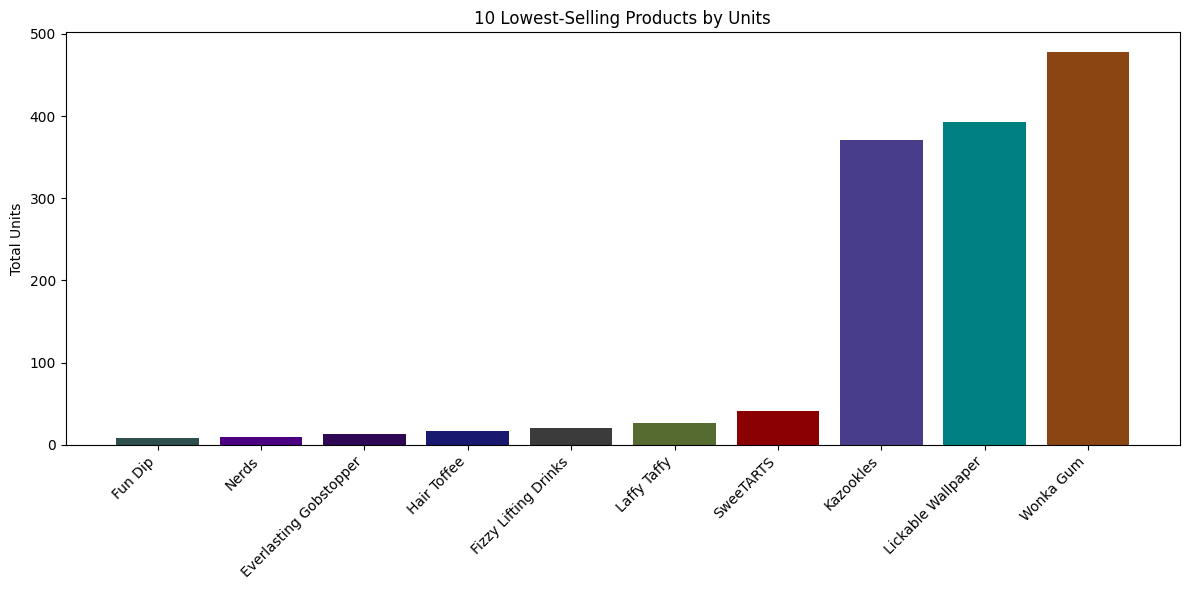

In [44]:
import matplotlib.pyplot as plt

# You already have last10_units from your code
# last10_units = product_summary.head(10)

colors = ['#2F4F4F', '#4B0082', '#2E0854', '#191970', '#3B3B3B',
          '#556B2F', '#8B0000', '#483D8B', '#008080', '#8B4513']  # 10 distinct dark colors

plt.figure(figsize=(12, 6))
plt.bar(last10_units['Product_Name'],
        last10_units['Total_Units'],
        color=colors[:len(last10_units)])

plt.title('10 Lowest-Selling Products by Units')
plt.ylabel('Total Units')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Production cost by Product

In [12]:
# Safely compute Total_Cost. Use Unit_Cost * Quantity if available,
# otherwise rebuild Total_Cost from df_raw (Cost) grouped by group_cols.
if 'Unit_Cost' in cost_per_product.columns and 'Quantity' in cost_per_product.columns:
	cost_per_product['Total_Cost'] = cost_per_product['Unit_Cost'] * cost_per_product['Quantity']
elif 'Total_Cost' in cost_per_product.columns:
	# Total_Cost already exists — nothing to change
	pass
else:
	if 'df_raw' in globals():
		group_cols_local = group_cols if 'group_cols' in globals() else ['Product Name', 'Division']
		cost_per_product = (
			df_raw
			.groupby(group_cols_local, as_index=False)
			.agg(Total_Cost=('Cost', 'sum'))
			.rename(columns={'Product Name': 'Product_Name'})
		)
	else:
		raise KeyError("Cannot compute Total_Cost: missing 'Unit_Cost'/'Quantity' and 'df_raw' is not available.")

cost_per_product.head(15)

,Product_Name,Division,Total_Cost,Unit_Name
0,Everlasting Gobstopper,Sugar,26.00,All Units
1,Fizzy Lifting Drinks,Sugar,31.50,All Units
2,Fun Dip,Sugar,7.20,All Units
3,Hair Toffee,Sugar,17.00,All Units
4,Kazookles,Other,1113.00,All Units
5,Laffy Taffy,Sugar,20.25,All Units
6,Lickable Wallpaper,Other,3930.00,All Units
7,Nerds,Sugar,8.00,All Units
8,SweeTARTS,Sugar,32.80,All Units
9,Wonka Bar - Fudge Mallows,Chocolate,8296.80,All Units


# Total Production Cost (all products)

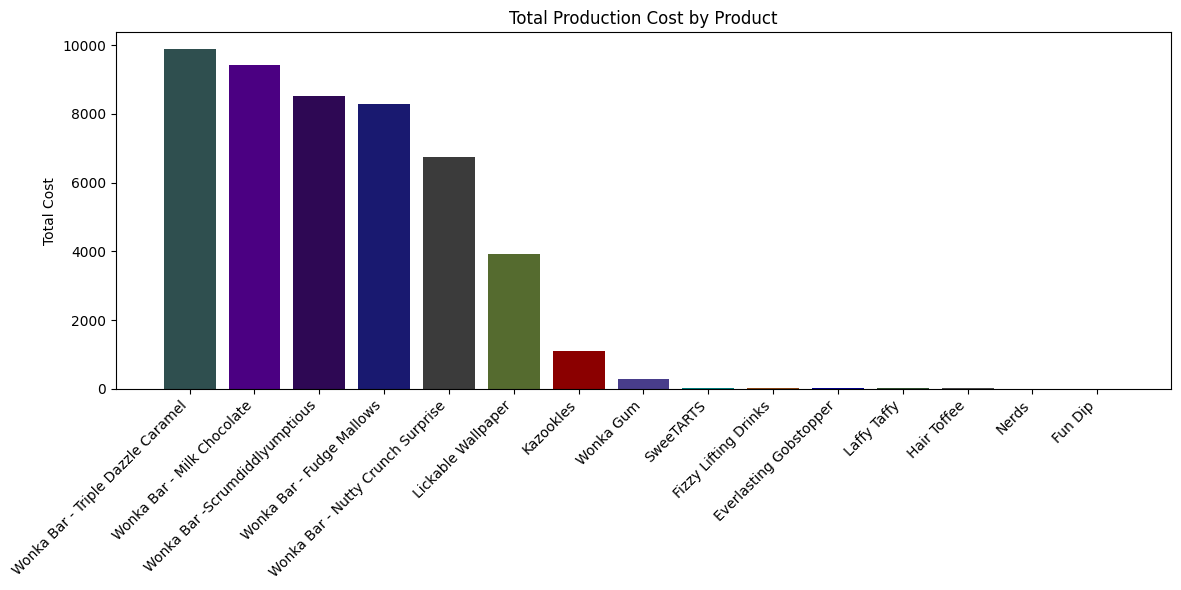

In [66]:
cost_total = cost_per_product.sort_values('Total_Cost', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(cost_total['Product_Name'],
        cost_total['Total_Cost'],
        color=['#2F4F4F', '#4B0082', '#2E0854', '#191970', '#3B3B3B',
               '#556B2F', '#8B0000', '#483D8B', '#008080', '#8B4513',
               '#00008B', '#2F4F2F', '#4B4B4B', '#6A5ACD', '#800000'][:len(cost_total)])
plt.title('Total Production Cost by Product')
plt.ylabel('Total Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


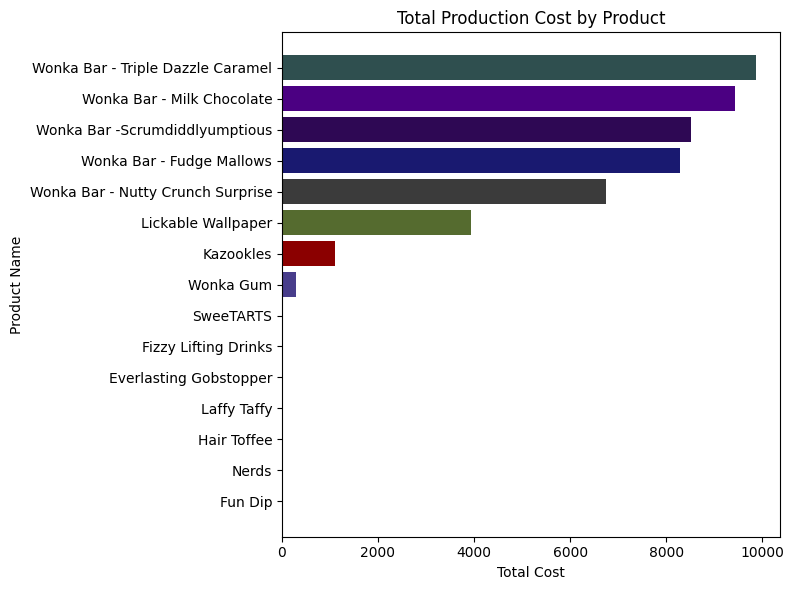

In [67]:
import matplotlib.pyplot as plt

cost_total = cost_per_product.sort_values('Total_Cost', ascending=False)

colors = ['#2F4F4F', '#4B0082', '#2E0854', '#191970', '#3B3B3B',
          '#556B2F', '#8B0000', '#483D8B', '#008080', '#8B4513',
          '#00008B', '#2F4F2F', '#4B4B4B', '#6A5ACD', '#800000'][:len(cost_total)]

plt.figure(figsize=(8, 6))
plt.barh(cost_total['Product_Name'],
         cost_total['Total_Cost'],
         color=colors)
plt.title('Total Production Cost by Product')
plt.xlabel('Total Cost')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # highest cost at the top
plt.tight_layout()
plt.show()


# Cost by region 

In [16]:
# cost_per_product does not contain 'Region'. Fall back to df_raw which has Region + Cost.
if 'Region' in cost_per_product.columns:
    cost_by_region = (
        cost_per_product
        .groupby('Region', as_index=False)['Total_Cost']
        .sum()
        .rename(columns={'Total_Cost': 'Total_Cost_Per_Region'})
    )
else:
    if 'df_raw' in globals() and 'Region' in df_raw.columns:
        cost_by_region = (
            df_raw
            .groupby('Region', as_index=False)['Cost']
            .sum()
            .rename(columns={'Cost': 'Total_Cost_Per_Region'})
        )
    else:
        raise KeyError("Cannot compute cost_by_region: no 'Region' column found in cost_per_product or df_raw.")

cost_by_region.head()

,Region,Total_Cost_Per_Region
0,Atlantic,14223.54
1,Gulf,7546.59
2,Interior,10755.11
3,Pacific,15815.59


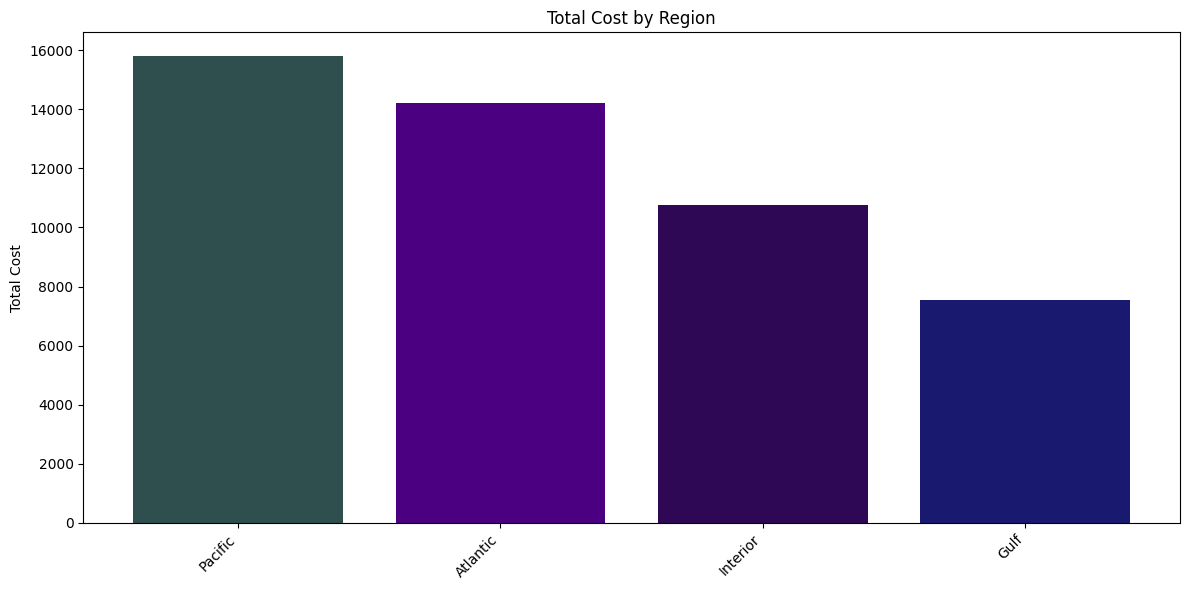

In [17]:
cost_by_region = cost_by_region.sort_values('Total_Cost_Per_Region', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(
    cost_by_region['Region'],
    cost_by_region['Total_Cost_Per_Region'],
    color=['#2F4F4F', '#4B0082', '#2E0854', '#191970', '#3B3B3B',
           '#556B2F', '#8B0000', '#483D8B', '#008080', '#8B4513',
           '#00008B', '#2F4F2F', '#4B4B4B', '#6A5ACD', '#800000'][:len(cost_by_region)]
)
plt.title('Total Cost by Region')
plt.ylabel('Total Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt

# Sales per Product 

In [71]:


sales_per_product = (
    df_raw
    .groupby(['Product Name', 'Division'], as_index=False)
    .agg(
        Total_Units=('Units', 'sum'),
        Total_Sales=('Sales', 'sum')
    )
    .rename(columns={'Product Name': 'Product_Name'})
)

print(sales_per_product.head(15))


                         Product_Name   Division  Total_Units  Total_Sales
0              Everlasting Gobstopper      Sugar           13       130.00
1                Fizzy Lifting Drinks      Sugar           21        78.75
2                             Fun Dip      Sugar            8        12.00
3                         Hair Toffee      Sugar           17        76.50
4                           Kazookles      Other          371      1205.75
5                         Laffy Taffy      Sugar           27        53.73
6                  Lickable Wallpaper      Other          393      7860.00
7                               Nerds      Sugar           10        15.00
8                           SweeTARTS      Sugar           41        61.50
9           Wonka Bar - Fudge Mallows  Chocolate         6914     24890.40
10         Wonka Bar - Milk Chocolate  Chocolate         8267     26867.75
11  Wonka Bar - Nutty Crunch Surprise  Chocolate         6755     23574.95
12  Wonka Bar - Triple Da

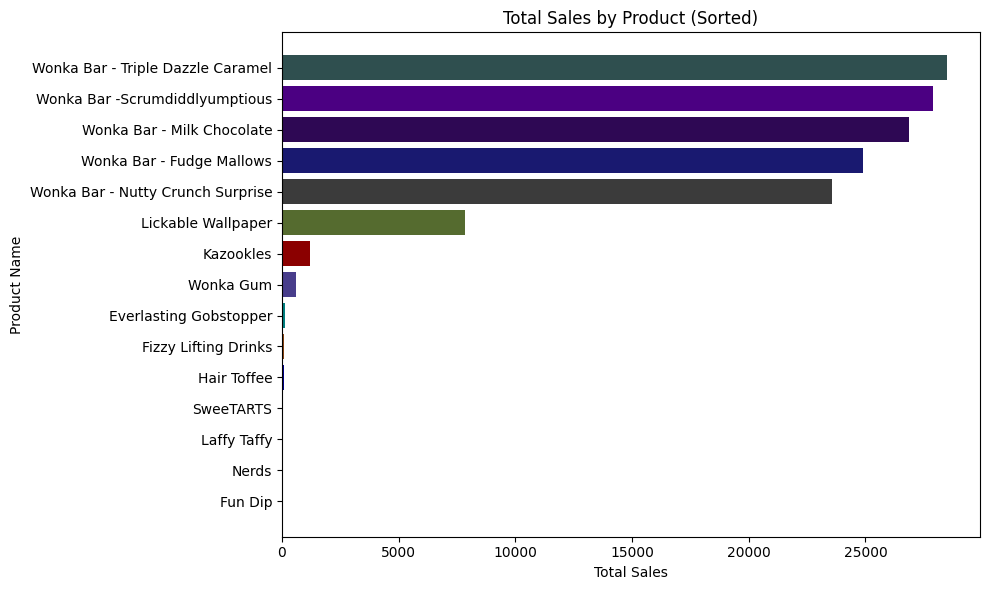

In [76]:
import matplotlib.pyplot as plt

# Sort products by total sales (highest first)
sales_total = sales_per_product.sort_values('Total_Sales', ascending=False)

# Optional: limit to top N if too many products, e.g. top 15
# sales_total = sales_total.head(15)

n = len(sales_total)
colors = ['#2F4F4F', '#4B0082', '#2E0854', '#191970', '#3B3B3B',
          '#556B2F', '#8B0000', '#483D8B', '#008080', '#8B4513',
          '#00008B', '#2F4F2F', '#4B4B4B', '#6A5ACD', '#800000']
colors = (colors * ((n // len(colors)) + 1))[:n]

plt.figure(figsize=(10, max(6, n * 0.4)))
plt.barh(
    sales_total['Product_Name'],
    sales_total['Total_Sales'],
    color=colors
)
plt.title('Total Sales by Product (Sorted)')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # highest sales at the top
plt.tight_layout()
plt.show()


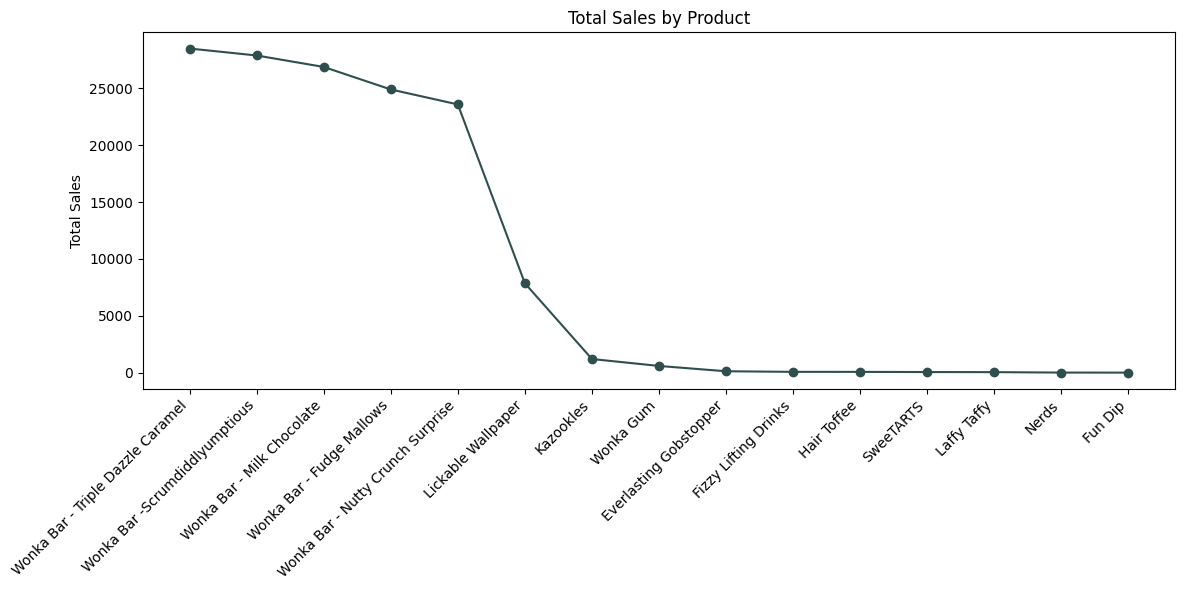

In [79]:
import matplotlib.pyplot as plt

sales_total = sales_per_product.sort_values('Total_Sales', ascending=False)

plt.figure(figsize=(12, 6))
plt.plot(
    sales_total['Product_Name'],
    sales_total['Total_Sales'],
    marker='o',
    linestyle='-',
    color='#2F4F4F'
)

plt.title('Total Sales by Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Gross profit margin per product

In [82]:
# Ensure 'Gross_Profit' exists in df_raw (handle different column names or compute it)
if 'Gross_Profit' not in df_raw.columns:
    if 'Gross Profit' in df_raw.columns:
        df_raw['Gross_Profit'] = df_raw['Gross Profit']
    else:
        # compute Gross_Profit from Sales and Cost if not present
        df_raw['Gross_Profit'] = df_raw['Sales'] - df_raw['Cost']

margins_per_product = (
    df_raw
    .groupby(['Product Name', 'Division'], as_index=False)
    .agg(
        Total_Sales=('Sales', 'sum'),
        Total_Cost=('Cost', 'sum'),
        Total_Profit=('Gross_Profit', 'sum')
    )
)

# Gross margin (%) = profit / sales, avoid division by zero
margins_per_product['Margin_pct'] = (
    margins_per_product['Total_Profit'] / margins_per_product['Total_Sales']
) * 100
margins_per_product.loc[margins_per_product['Total_Sales'] == 0, 'Margin_pct'] = 0

margins_per_product = margins_per_product.rename(columns={'Product Name': 'Product_Name'})

print(margins_per_product.head(15))


                         Product_Name   Division  Total_Sales  Total_Cost  \
0              Everlasting Gobstopper      Sugar       130.00       26.00   
1                Fizzy Lifting Drinks      Sugar        78.75       31.50   
2                             Fun Dip      Sugar        12.00        7.20   
3                         Hair Toffee      Sugar        76.50       17.00   
4                           Kazookles      Other      1205.75     1113.00   
5                         Laffy Taffy      Sugar        53.73       20.25   
6                  Lickable Wallpaper      Other      7860.00     3930.00   
7                               Nerds      Sugar        15.00        8.00   
8                           SweeTARTS      Sugar        61.50       32.80   
9           Wonka Bar - Fudge Mallows  Chocolate     24890.40     8296.80   
10         Wonka Bar - Milk Chocolate  Chocolate     26867.75     9424.38   
11  Wonka Bar - Nutty Crunch Surprise  Chocolate     23574.95     6755.00   

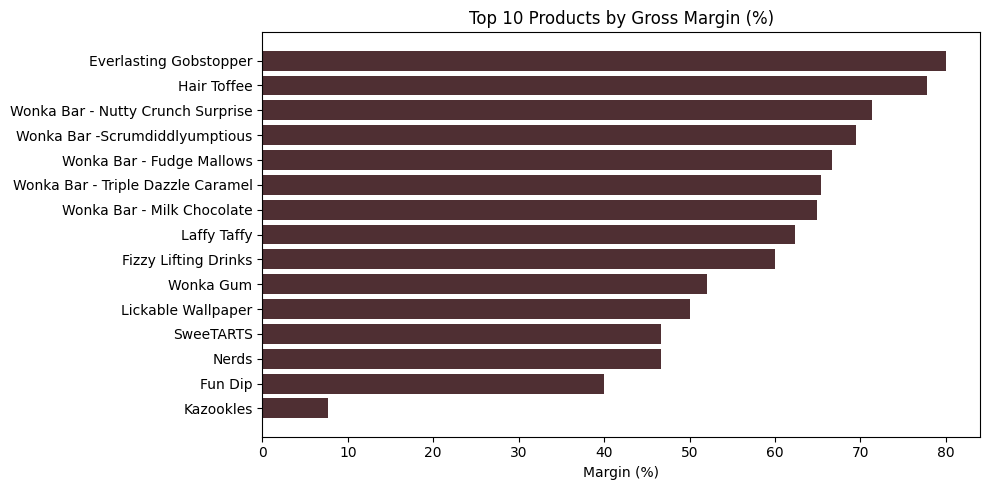

In [84]:
top_margin = (
    margins_per_product
    .sort_values('Margin_pct', ascending=False)
    .head(15)
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(top_margin['Product_Name'], top_margin['Margin_pct'], color="#4F2F33")
plt.title('Top 10 Products by Gross Margin (%)')
plt.xlabel('Margin (%)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


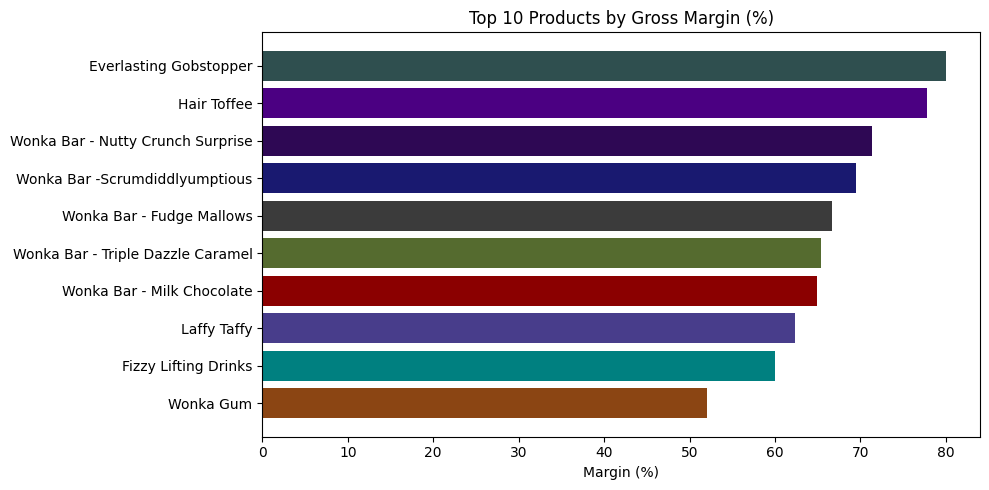

In [85]:
top_margin = (
    margins_per_product
    .sort_values('Margin_pct', ascending=False)
    .head(10)
)

import matplotlib.pyplot as plt

colors = ['#2F4F4F', '#4B0082', '#2E0854', '#191970', '#3B3B3B',
          '#556B2F', '#8B0000', '#483D8B', '#008080', '#8B4513']

colors = colors[:len(top_margin)]

plt.figure(figsize=(10, 5))
plt.barh(top_margin['Product_Name'],
         top_margin['Margin_pct'],
         color=colors)
plt.title('Top 10 Products by Gross Margin (%)')
plt.xlabel('Margin (%)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Gross profit per product

In [87]:
import pandas as pd

gross_profit_per_product = (
    df_raw
    .groupby(['Product Name', 'Division'], as_index=False)
    .agg(
        Total_Sales=('Sales', 'sum'),
        Total_Cost=('Cost', 'sum'),
        Gross_Profit=('Gross_Profit', 'sum')
    )
    .rename(columns={'Product Name': 'Product_Name'})
)

print(gross_profit_per_product.head(15))


                         Product_Name   Division  Total_Sales  Total_Cost  \
0              Everlasting Gobstopper      Sugar       130.00       26.00   
1                Fizzy Lifting Drinks      Sugar        78.75       31.50   
2                             Fun Dip      Sugar        12.00        7.20   
3                         Hair Toffee      Sugar        76.50       17.00   
4                           Kazookles      Other      1205.75     1113.00   
5                         Laffy Taffy      Sugar        53.73       20.25   
6                  Lickable Wallpaper      Other      7860.00     3930.00   
7                               Nerds      Sugar        15.00        8.00   
8                           SweeTARTS      Sugar        61.50       32.80   
9           Wonka Bar - Fudge Mallows  Chocolate     24890.40     8296.80   
10         Wonka Bar - Milk Chocolate  Chocolate     26867.75     9424.38   
11  Wonka Bar - Nutty Crunch Surprise  Chocolate     23574.95     6755.00   

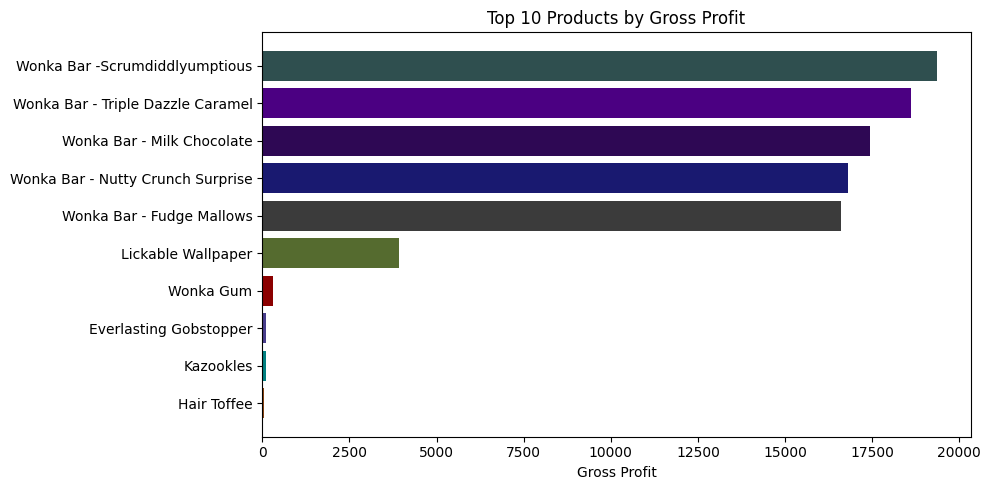

In [88]:
import matplotlib.pyplot as plt

top_profit = (
    gross_profit_per_product
    .sort_values('Gross_Profit', ascending=False)
    .head(10)
)

colors = ['#2F4F4F', '#4B0082', '#2E0854', '#191970', '#3B3B3B',
          '#556B2F', '#8B0000', '#483D8B', '#008080', '#8B4513'][:len(top_profit)]

plt.figure(figsize=(10, 5))
plt.barh(top_profit['Product_Name'], top_profit['Gross_Profit'], color=colors)
plt.title('Top 10 Products by Gross Profit')
plt.xlabel('Gross Profit')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


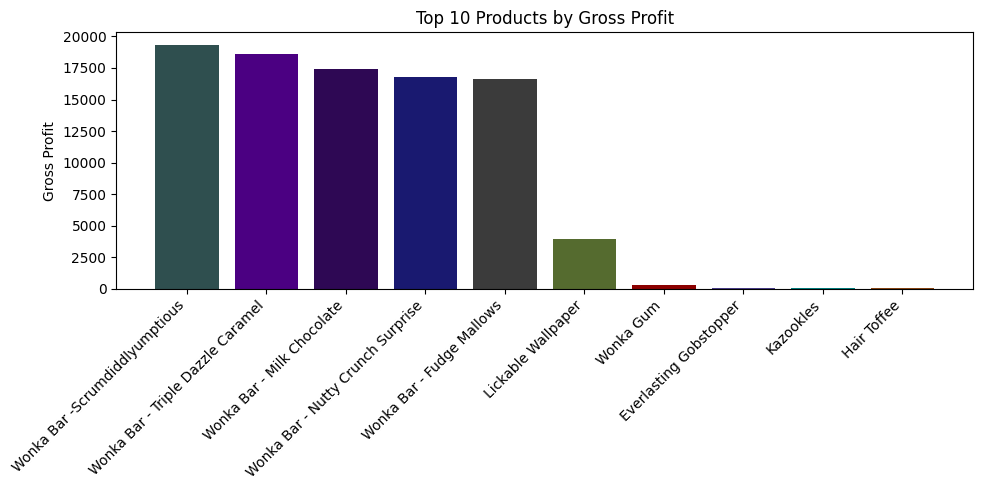

In [89]:
import matplotlib.pyplot as plt

top_profit = (
    gross_profit_per_product
    .sort_values('Gross_Profit', ascending=False)
    .head(10)
)

colors = ['#2F4F4F', '#4B0082', '#2E0854', '#191970', '#3B3B3B',
          '#556B2F', '#8B0000', '#483D8B', '#008080', '#8B4513'][:len(top_profit)]

plt.figure(figsize=(10, 5))
plt.bar(top_profit['Product_Name'],
        top_profit['Gross_Profit'],
        color=colors)
plt.title('Top 10 Products by Gross Profit')
plt.ylabel('Gross Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


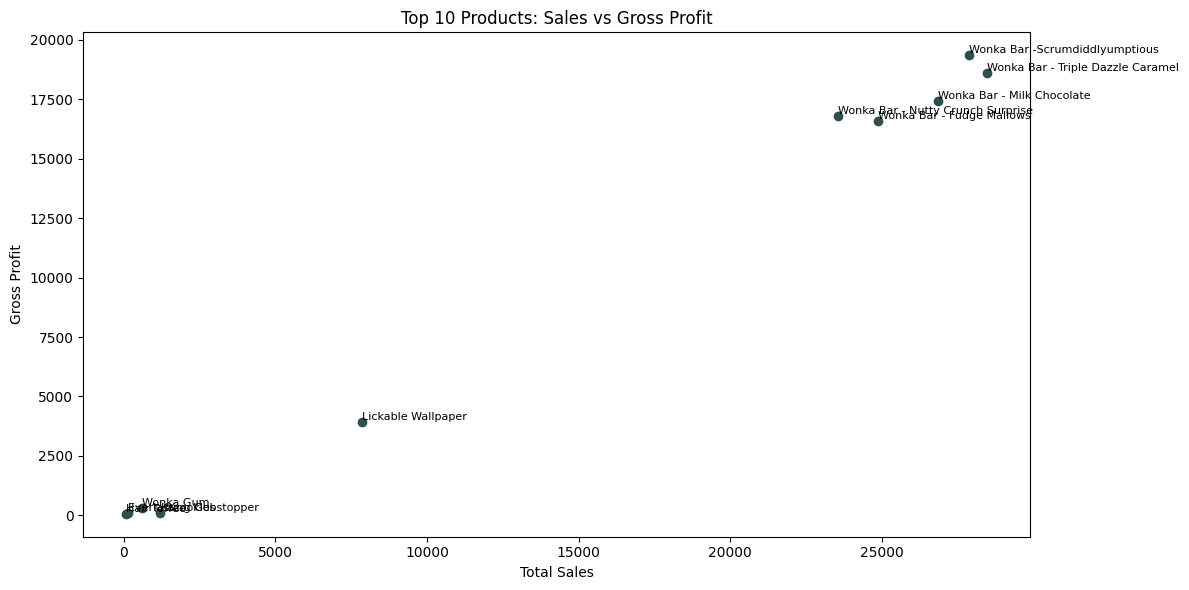

In [91]:
import matplotlib.pyplot as plt

top_profit = (
    gross_profit_per_product
    .sort_values('Gross_Profit', ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
plt.scatter(top_profit['Total_Sales'],
            top_profit['Gross_Profit'],
            color='#2F4F4F')

for _, row in top_profit.iterrows():
    plt.text(row['Total_Sales'],
             row['Gross_Profit'],
             row['Product_Name'],
             fontsize=8,
             ha='left',
             va='bottom')

plt.title('Top 10 Products: Sales vs Gross Profit')
plt.xlabel('Total Sales')
plt.ylabel('Gross Profit')
plt.tight_layout()
plt.show()


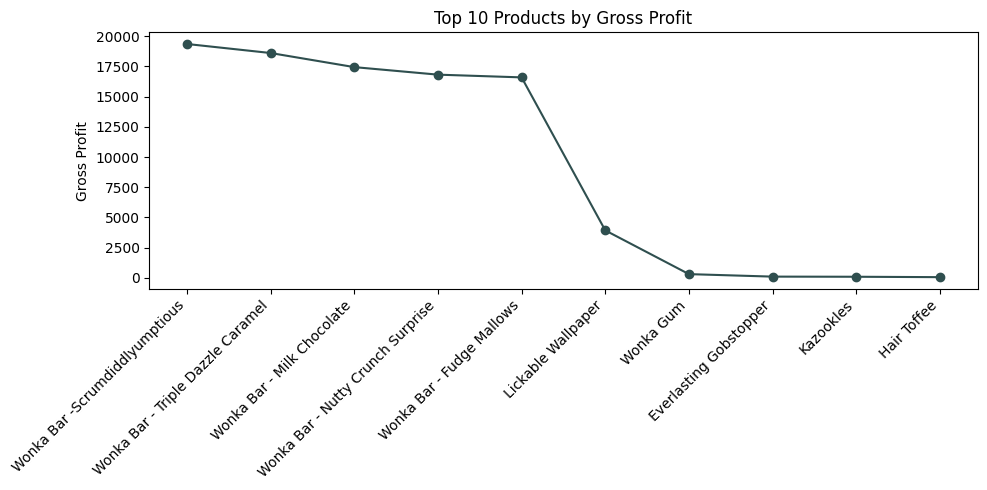

In [92]:
import matplotlib.pyplot as plt

top_profit = (
    gross_profit_per_product
    .sort_values('Gross_Profit', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
plt.plot(
    top_profit['Product_Name'],
    top_profit['Gross_Profit'],
    marker='o',
    linestyle='-',
    color='#2F4F4F'
)

plt.title('Top 10 Products by Gross Profit')
plt.ylabel('Gross Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


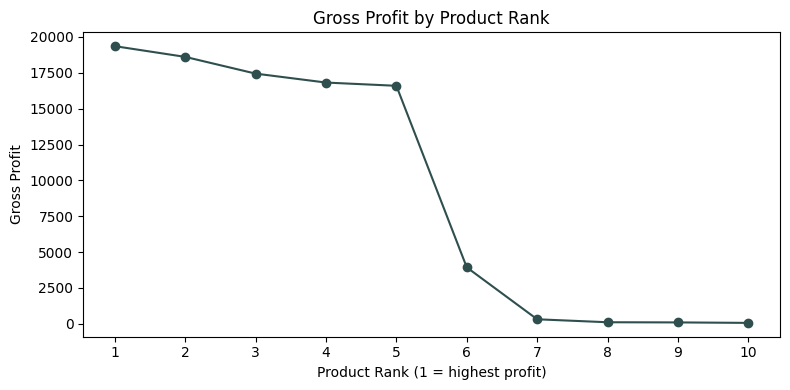

In [93]:
top_profit = top_profit.reset_index(drop=True)
top_profit['Rank'] = top_profit.index + 1

plt.figure(figsize=(8, 4))
plt.plot(top_profit['Rank'],
         top_profit['Gross_Profit'],
         marker='o',
         linestyle='-',
         color='#2F4F4F')
plt.title('Gross Profit by Product Rank')
plt.xlabel('Product Rank (1 = highest profit)')
plt.ylabel('Gross Profit')
plt.xticks(top_profit['Rank'])
plt.tight_layout()
plt.show()


# Cost vs Sale per Unit 

In [21]:
import numpy as np

# Determine sales summary: use existing sales_per_product if available, otherwise compute from df_raw
if 'sales_per_product' in globals():
    sales_summary = sales_per_product.copy()
else:
    if 'df_raw' in globals():
        sales_summary = (
            df_raw
            .groupby(['Product Name', 'Division'], as_index=False)
            .agg(
                Total_Units=('Units', 'sum'),
                Total_Sales=('Sales', 'sum')
            )
            .rename(columns={'Product Name': 'Product_Name'})
        )
    else:
        raise KeyError("Cannot build sales summary: 'sales_per_product' not defined and 'df_raw' not available.")

# Normalize column names for merging (use Total_Quantity as the name expected downstream)
sales_for_merge = sales_summary.rename(columns={'Total_Units': 'Total_Quantity'})[
    ['Product_Name', 'Division', 'Total_Quantity', 'Total_Sales']
]

# Build product_agg by merging available summaries (cost_per_product and sales_for_merge)
product_agg = pd.merge(
    cost_per_product,
    sales_for_merge,
    on=['Product_Name', 'Division'],
    how='outer'
)

# If Total_Quantity still missing for some products, try to compute from df_raw (Units)
group_cols_local = group_cols if 'group_cols' in globals() else ['Product Name', 'Division']
if ('Total_Quantity' not in product_agg.columns) or product_agg['Total_Quantity'].isnull().any():
    if 'df_raw' in globals():
        qty_from_df = (
            df_raw
            .groupby(group_cols_local, as_index=False)
            .agg(Total_Quantity=('Units', 'sum'))
            .rename(columns={'Product Name': 'Product_Name'})
        )
        product_agg = pd.merge(product_agg, qty_from_df, on=['Product_Name', 'Division'], how='left', suffixes=('', '_from_df'))
        if 'Total_Quantity_from_df' in product_agg.columns:
            product_agg['Total_Quantity'] = product_agg['Total_Quantity'].fillna(product_agg['Total_Quantity_from_df'])
            product_agg = product_agg.drop(columns=[c for c in product_agg.columns if c.endswith('_from_df')])
    else:
        # If df_raw isn't available, fill missing quantities with 0 to avoid failures downstream
        if 'Total_Quantity' not in product_agg.columns:
            product_agg['Total_Quantity'] = 0
        else:
            product_agg['Total_Quantity'] = product_agg['Total_Quantity'].fillna(0)

# Ensure numeric columns exist and fill NaN with 0 where appropriate
for col in ['Total_Cost', 'Total_Quantity', 'Total_Sales']:
    if col in product_agg.columns:
        product_agg[col] = pd.to_numeric(product_agg[col], errors='coerce').fillna(0)

# Compute per-unit metrics safely (avoid division by zero)
product_agg['Cost_per_Unit'] = np.where(
    product_agg['Total_Quantity'] > 0,
    product_agg['Total_Cost'] / product_agg['Total_Quantity'],
    np.nan
)

product_agg['Sales_per_Unit'] = np.where(
    product_agg['Total_Quantity'] > 0,
    product_agg['Total_Sales'] / product_agg['Total_Quantity'],
    np.nan
)

print(product_agg[['Product_Name', 'Division', 'Total_Quantity', 'Total_Cost', 'Total_Sales', 'Cost_per_Unit', 'Sales_per_Unit']].head(15))

                         Product_Name   Division  Total_Quantity  Total_Cost  \
0              Everlasting Gobstopper      Sugar              13       26.00   
1                Fizzy Lifting Drinks      Sugar              21       31.50   
2                             Fun Dip      Sugar               8        7.20   
3                         Hair Toffee      Sugar              17       17.00   
4                           Kazookles      Other             371     1113.00   
5                         Laffy Taffy      Sugar              27       20.25   
6                  Lickable Wallpaper      Other             393     3930.00   
7                               Nerds      Sugar              10        8.00   
8                           SweeTARTS      Sugar              41       32.80   
9           Wonka Bar - Fudge Mallows  Chocolate            6914     8296.80   
10         Wonka Bar - Milk Chocolate  Chocolate            8267     9424.38   
11  Wonka Bar - Nutty Crunch Surprise  C

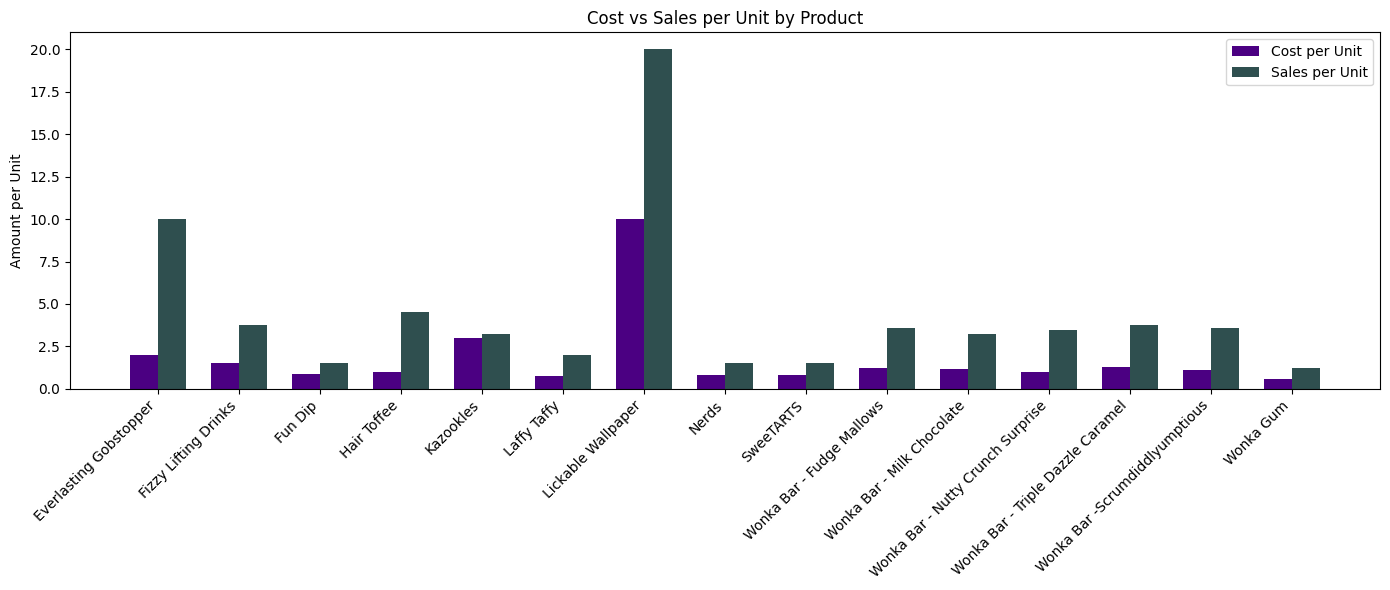

In [22]:
import numpy as np

product_agg = product_agg.sort_values('Product_Name')

x = np.arange(len(product_agg))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, product_agg['Cost_per_Unit'],
        width, label='Cost per Unit', color='#4B0082')
plt.bar(x + width/2, product_agg['Sales_per_Unit'],
        width, label='Sales per Unit', color='#2F4F4F')

plt.xticks(x, product_agg['Product_Name'], rotation=45, ha='right')
plt.ylabel('Amount per Unit')
plt.title('Cost vs Sales per Unit by Product')
plt.legend()
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt

In [23]:
product_agg_sorted = product_agg.sort_values(
    'Sales_per_Unit', ascending=False
)
x = np.arange(len(product_agg_sorted))

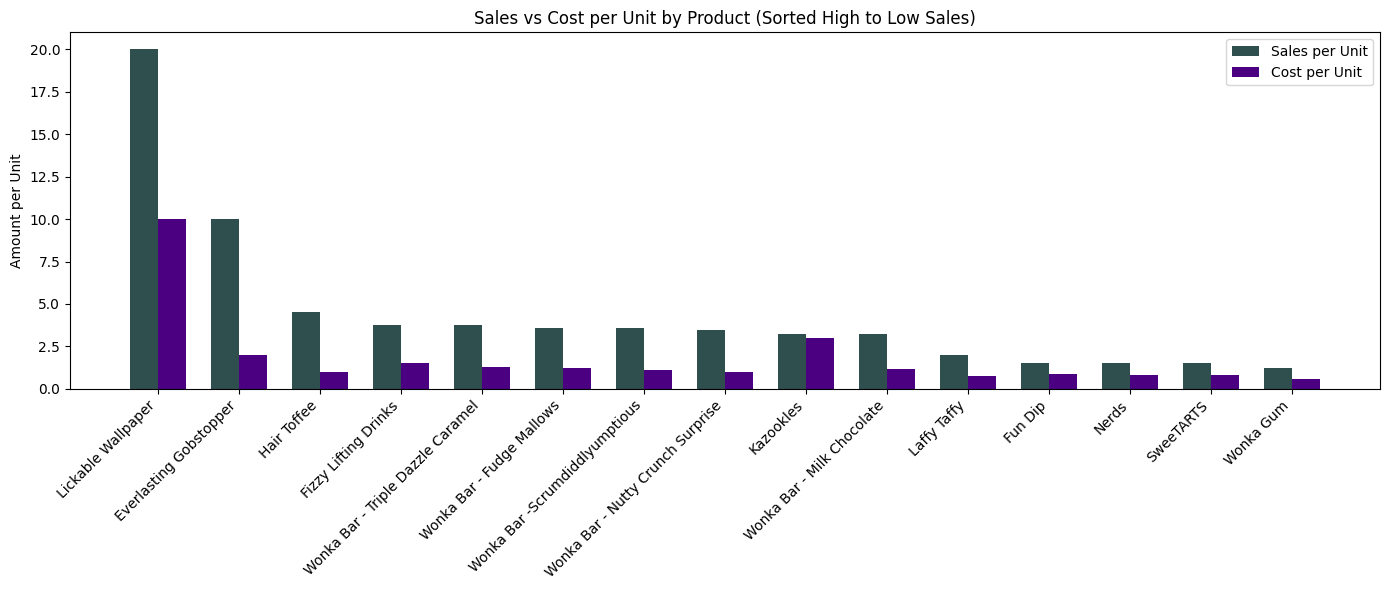

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(product_agg_sorted))
width = 0.35

plt.figure(figsize=(14, 6))

plt.bar(
    x - width/2,
    product_agg_sorted['Sales_per_Unit'],
    width,
    label='Sales per Unit',
    color='#2F4F4F'
)

plt.bar(
    x + width/2,
    product_agg_sorted['Cost_per_Unit'],
    width,
    label='Cost per Unit',
    color='#4B0082'
)

plt.xticks(x, product_agg_sorted['Product_Name'], rotation=45, ha='right')
plt.ylabel('Amount per Unit')
plt.title('Sales vs Cost per Unit by Product (Sorted High to Low Sales)')
plt.legend()
plt.tight_layout()
plt.show()


# Profit per unit by product 


In [25]:
product_agg['Profit_per_Unit'] = (
    product_agg['Sales_per_Unit'] - product_agg['Cost_per_Unit']
)

product_agg['Margin_per_Unit'] = (
    product_agg['Profit_per_Unit'] / product_agg['Sales_per_Unit']
)
product_agg[['Product_Name', 'Division', 'Cost_per_Unit', 'Sales_per_Unit', 'Profit_per_Unit', 'Margin_per_Unit']].head(15)

,Product_Name,Division,Cost_per_Unit,Sales_per_Unit,Profit_per_Unit,Margin_per_Unit
0,Everlasting Gobstopper,Sugar,2.00,10.00,8.00,0.800000
1,Fizzy Lifting Drinks,Sugar,1.50,3.75,2.25,0.600000
2,Fun Dip,Sugar,0.90,1.50,0.60,0.400000
3,Hair Toffee,Sugar,1.00,4.50,3.50,0.777778
4,Kazookles,Other,3.00,3.25,0.25,0.076923
5,Laffy Taffy,Sugar,0.75,1.99,1.24,0.623116
6,Lickable Wallpaper,Other,10.00,20.00,10.00,0.500000
7,Nerds,Sugar,0.80,1.50,0.70,0.466667
8,SweeTARTS,Sugar,0.80,1.50,0.70,0.466667
9,Wonka Bar - Fudge Mallows,Chocolate,1.20,3.60,2.40,0.666667


In [26]:
product_profit = product_agg.sort_values('Profit_per_Unit', ascending=False)


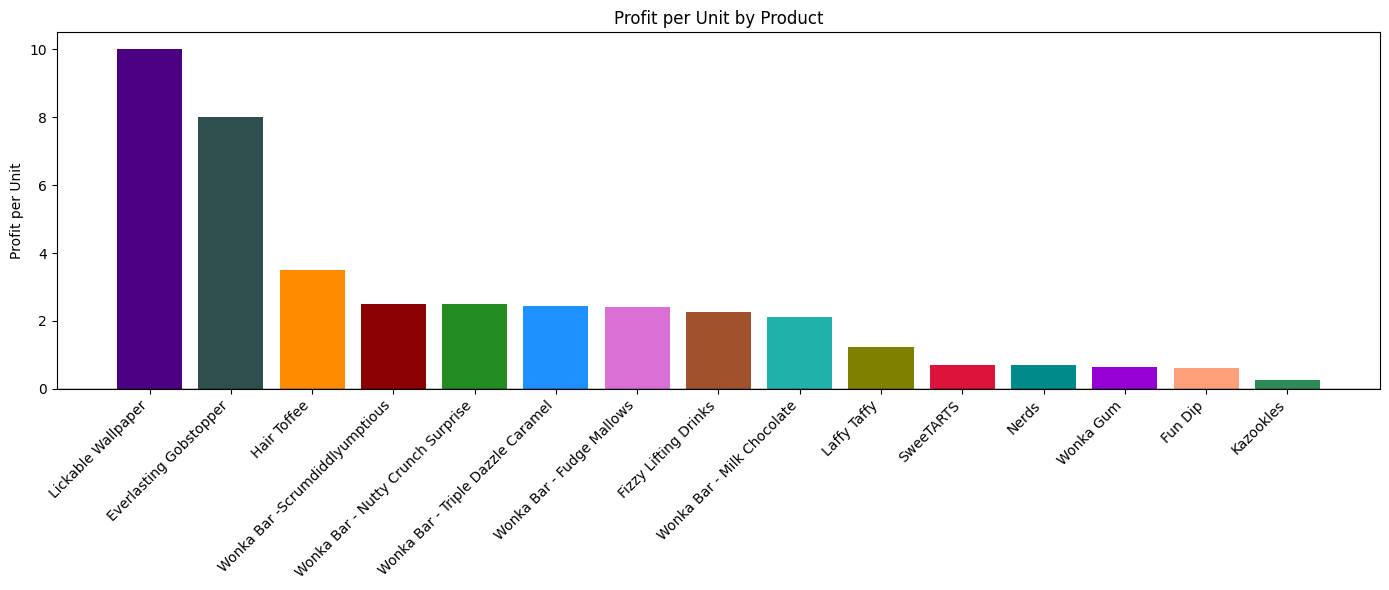

In [29]:
colors = [
    '#4B0082', '#2F4F4F', '#FF8C00', '#8B0000', '#228B22',
    '#1E90FF', '#DA70D6', '#A0522D', '#20B2AA', '#808000',
    '#DC143C', '#008B8B', '#9400D3', '#FFA07A', '#2E8B57'
]

plt.figure(figsize=(14, 6))
plt.bar(
    product_plot['Product_Name'],
    product_plot['Profit_per_Unit'],
    color=colors[:len(product_plot)]
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Profit per Unit')
plt.title('Profit per Unit by Product')
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()
